# k-Nearest Neighbors Regressor

El regresor mediante la técnica de los $k$ vecinos realiza un sencillo e intuitivo planteamiento para resolver el problema de la regresión. Su idea más básica consiste en determinar el valor $y$ asociado a una muestra $X$ en función de los valores $y$ de las $k$ muestras $X^\prime$ más cercanas a $X$ (*i.e.* sus $k$ vecinos).

Ilustremos esto de forma gráfica:

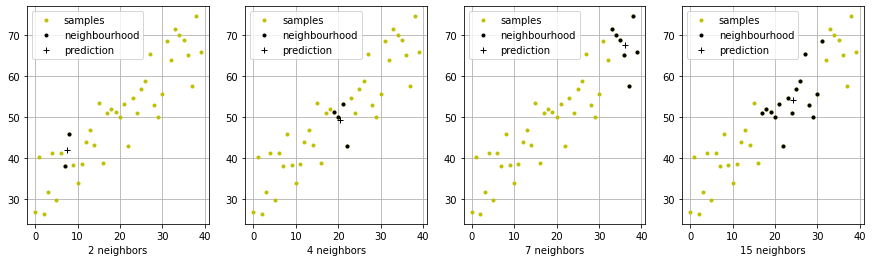

In [0]:
import matplotlib.pyplot as plt
import random

# Create the samples
X = list(range(40))
y = []
for i in range(len(X)):
    y.append(20+X[i]+random.random()*20)

# linear regression evolution 
fig, axs = plt.subplots(1,4, figsize=(15,4))

# return the prediction of x data, by using k neighbours
def KNN_prediction(k, X, y, x, figure):
    distance = []
    for i in range(len(X)):  
        distance.append((X[i],y[i],(x-X[i])**2))  # create pairs (X[i], y[i], distance from x to X[i]) 
  # sorts distance vector attending to the set of distances from x to X[i]
    sorted_list = sort(distance)  
    
    x_neighbourhood, y_neighbourhood = [], []; 
    y_prediction = 0.0
    for i in range(k):  # k-neighbours
        y_prediction += sorted_list[i][1]
        x_neighbourhood.append(sorted_list[i][0])
        y_neighbourhood.append(sorted_list[i][1])
    y_prediction /= k    

    plot(figure,X,y,'y.', "samples")    # plot samples
    # plot the k neighbours     
    plot(figure,x_neighbourhood,y_neighbourhood,'k.', "neighbourhood") 
    # plot the (x,y_prediction) prediction   
    plot(figure,x,y_prediction,"k+", 'prediction')
    axs[figure].set_xlabel('{:1.0f}'.format(k) + ' neighbors')
    return y_prediction

def sort(unsorted_list):
    return (sorted(unsorted_list, key = lambda x: x[2]))

def plot(fig, X, y, parameters, label):
    axs[fig].plot(X, y, parameters, label = label)
    axs[fig].legend(); axs[fig].grid(); 
    return

KNN_prediction(2,X, y, 7.6, 0)
KNN_prediction(4,X, y, 20.5, 1)
KNN_prediction(7,X, y, 36.2, 2)
KNN_prediction(15,X, y, 24.3, 3)

plt.show()

Podemos observar como la predicción (eje *y*) se realiza mediante el valor medio de los $k$ valores (eje *x*) más cercanos al punto dado (representado mediante una cruz).

Este sencillo ejemplo muestra el funcionamiento del método de forma gráfica para una sola variable ($x$). Conceptualmente, podemos realizar el mismo procedimiento cuando se disponga de múltiples variables de entrada ($x_1. \cdots, x_n$), aunque no sea posible representarlo de manera gráfica.

Este método de regresión se encuentra implementado en la clase [`sklearn.neighbors.KNeighborsRegressor`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html) de la librería `sklearn`. Su constructor dispone dos parámetros que debemos definir:

- `n_neighbors` indica el número de vecinos a utilizar para ponderar el valor de la predicción.
- `weights` define la influencia de cada uno de los vecinos en el valor de la predicción. Si se establece como `"uniform"` (por defecto) todos los vecinos tienen el mismo peso en la predicción, mientras que si se establece como `"distance"` cada vecino tiene un peso inversamente proporcional a su distancia (más cercanos mayor y menos cercanos menor) en la predicción.

El constructor dispone de otro parámetro interesante que es `metric` el cual permite establecer cómo se determina la distancia entre dos puntos. Por defecto, se emplea la distancia euclídea, pero esto puede no ser conveniente en algunos conjuntos de datos.

El siguiente ejemplo muestra el funcionamiento del regresor sobre un conjunto de datos sintéticos:

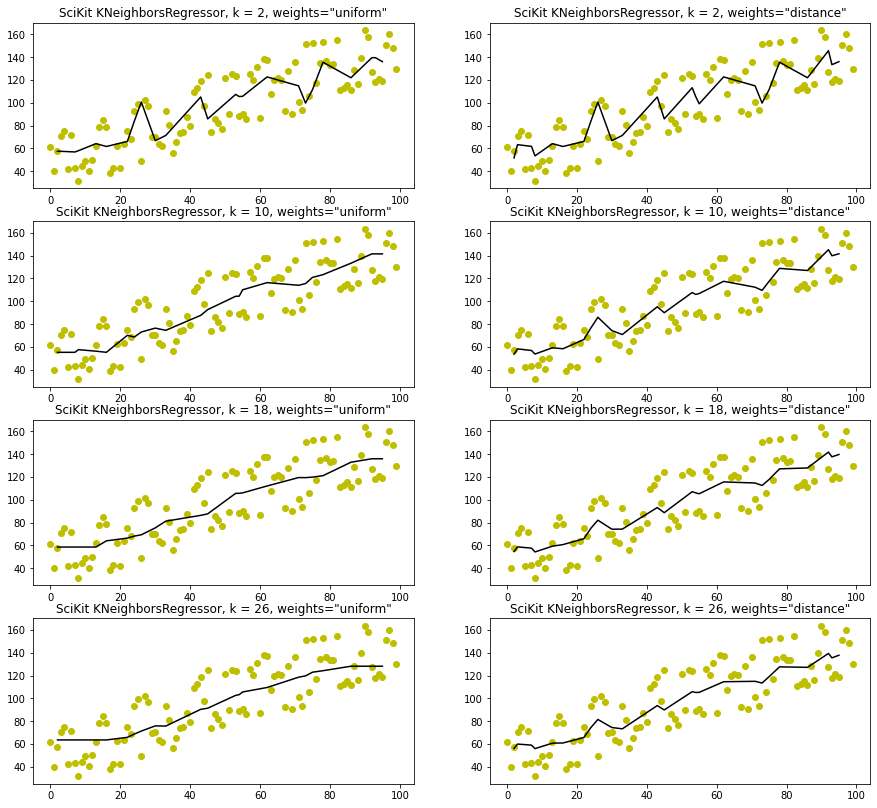

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import train_test_split
import random

X = np.array(list(range(100)))[:, np.newaxis]
y = []
for i in range(len(X)):
    y.append(20+X[i]+random.random()*60)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

X_test.sort(0)

fig, axs = plt.subplots(4,2, figsize=(15,14))
for i,n_neighbors in zip([0,1,2,3], [2,10,18,26]):
    knn_regressor = neighbors.KNeighborsRegressor(n_neighbors)
    knn_regressor.fit(X_train, y_train)
    y_hat = knn_regressor.predict(X_test)
    
    axs[i, 0].scatter(X, y, c='y')
    axs[i, 0].plot(X_test, y_hat, c='k')
    axs[i, 0].set_title('SciKit KNeighborsRegressor, k = '+  str(n_neighbors) + ', weights="uniform"' )
    
    knn_regressor_dist = neighbors.KNeighborsRegressor(n_neighbors, 'distance')
    knn_regressor_dist.fit(X_train, y_train)
    y_hat = knn_regressor_dist.predict(X_test)
    
    axs[i, 1].scatter(X, y, c='y')
    axs[i, 1].plot(X_test, y_hat, c='k')
    axs[i, 1].set_title('SciKit KNeighborsRegressor, k = '+  str(n_neighbors) + ', weights="distance"' )


plt.show()